**Cyclistic Bike-Share Analysis**

Data Cleaning

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import datetime
import pytz
import dateutil

In [2]:
df = pd.read_csv('202107-divvy-tripdata.csv')


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

String data type trimming

In [5]:
df[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id',
       'member_casual']]=df[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id',
       'member_casual']].apply(lambda x: x.str.strip())

In [7]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2020-05-27 10:03:00,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822405,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.770000,-87.660000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822408,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


Data type conversion

In [8]:
df['started_at']=df['started_at'].astype('datetime64[ns]')

In [9]:
df['ended_at']=df['ended_at'].astype('datetime64[ns]')

In [10]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

Clean null values

In [11]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    87263
start_station_id      87262
end_station_name      93158
end_station_id        93158
start_lat                 0
start_lng                 0
end_lat                 731
end_lng                 731
member_casual             0
dtype: int64

In [12]:
(93158/822410)*100 # there are about 11% of rows of data with null values 

11.327440084629322

Add ride_length column

In [13]:
# ride_length = ended_at - started at

df['ride_length']=df.apply(lambda row:row['ended_at']-row['started_at'],axis=1)


In [14]:
df.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
dtype: object

In [15]:
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length'],
      dtype='object')

In [16]:
df=df[['ride_id', 'rideable_type', 'started_at', 'ended_at','ride_length',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual']]
df

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2020-05-27 10:03:00,2021-07-02 15:19:58,401 days 05:16:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,0 days 00:18:27,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,0 days 00:17:50,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,0 days 00:15:02,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,0 days 00:19:03,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822405,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,0 days 00:49:32,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.770000,-87.660000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,0 days 00:07:05,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,0 days 00:15:16,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822408,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,0 days 00:01:08,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


Look for outliers.

In [17]:
df.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,822410,822410.000000,822410.000000,821679.000000,821679.000000
mean,0 days 00:24:54.786945684,41.903565,-87.645536,41.903815,-87.645662
std,0 days 11:12:06.421198291,0.043153,0.026856,0.043289,0.027065
min,-1 days +23:59:48,41.648501,-87.840000,41.630000,-87.850000
25%,0 days 00:07:35,41.883380,-87.659660,41.883380,-87.659753
50%,0 days 00:13:21,41.900219,-87.641170,41.900960,-87.641170
75%,0 days 00:23:44,41.929143,-87.627691,41.929505,-87.627680
max,401 days 05:16:58,42.070000,-87.520000,42.150000,-87.490000


In [18]:
df.dtypes


ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
dtype: object

Convert the ride length data to minutes

In [19]:
df['ride_length']= df['ride_length']/np.timedelta64(1,'m')
df

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2020-05-27 10:03:00,2021-07-02 15:19:58,577756.966667,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,18.450000,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,17.833333,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,15.033333,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,19.050000,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822405,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,49.533333,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.770000,-87.660000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,7.083333,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,15.266667,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822408,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,1.133333,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


In [20]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
ride_length                  float64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

Convert ride_length to int.

In [21]:
df['ride_length']=df['ride_length'].astype('int')

In [22]:
df.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,822410.000000,822410.000000,822410.000000,821679.000000,821679.000000
mean,24.423079,41.903565,-87.645536,41.903815,-87.645662
std,672.106147,0.043153,0.026856,0.043289,0.027065
min,0.000000,41.648501,-87.840000,41.630000,-87.850000
25%,7.000000,41.883380,-87.659660,41.883380,-87.659753
50%,13.000000,41.900219,-87.641170,41.900960,-87.641170
75%,23.000000,41.929143,-87.627691,41.929505,-87.627680
max,577756.000000,42.070000,-87.520000,42.150000,-87.490000


<Axes: >

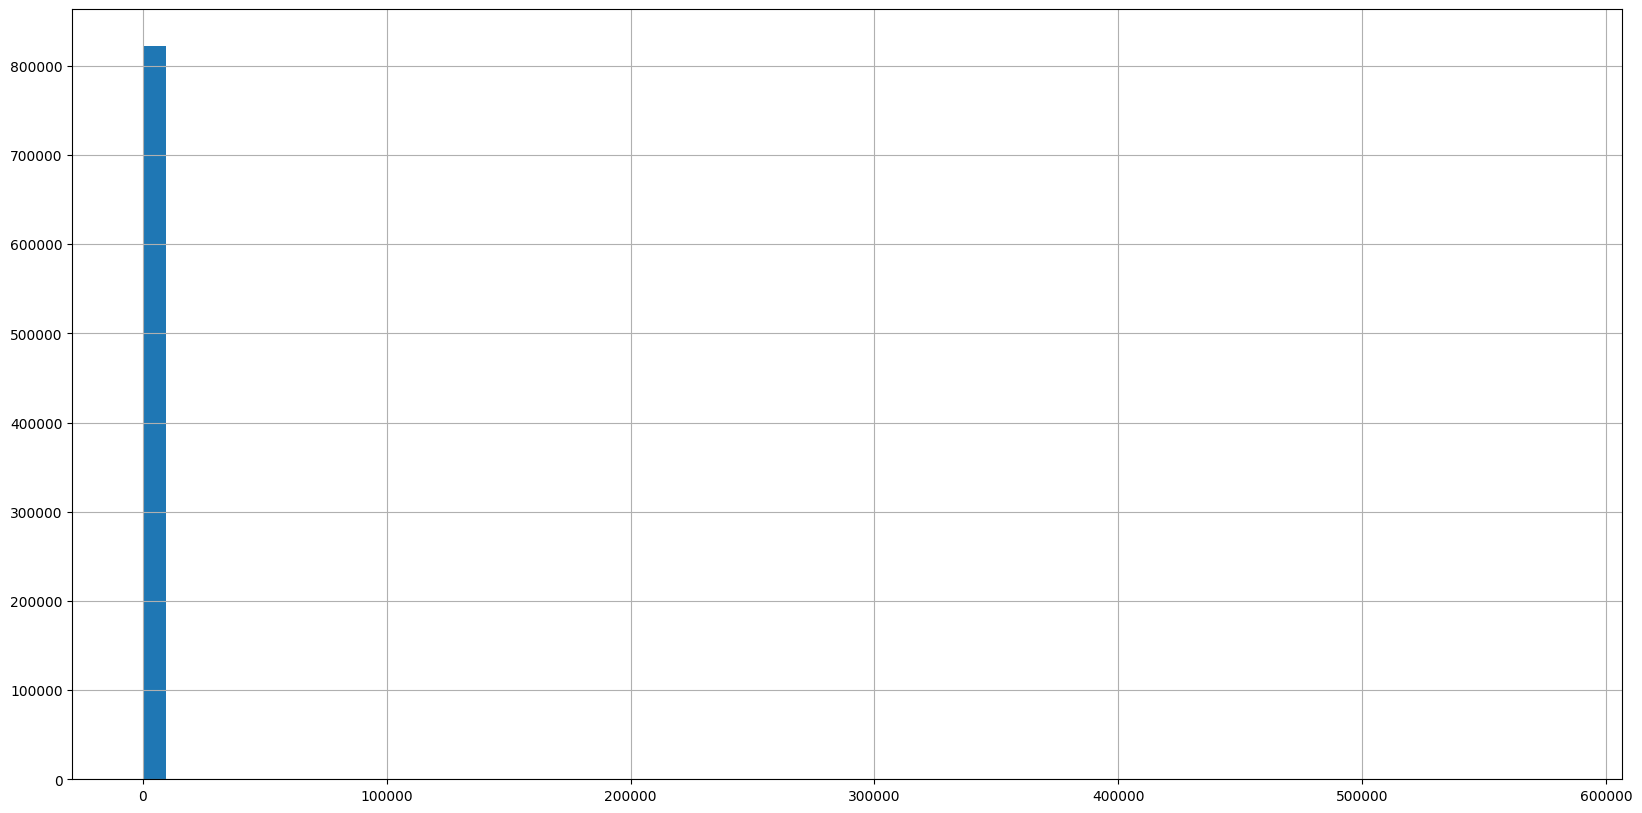

In [24]:
df['ride_length'].hist(bins=60, figsize=(20,10))


Descriptive statistic reveals most of the data is between 0 and 23 minutes with the mean at almost 25 minutes while just above 25% of the data is well outside those perimeters.

In [25]:
dfs=df
dfs

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2020-05-27 10:03:00,2021-07-02 15:19:58,577756,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,18,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,17,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,15,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,19,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822405,1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,49,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.770000,-87.660000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,7,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,15,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822408,6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,1,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


To obtain a more accurate data to measure usage I select only the data within the min and just above the 75th percentile for the dataset. This decision will assist in obtaining results that reflect where the majority of the data lies.

In [26]:
mask = dfs[(dfs['ride_length']<0) | (dfs['ride_length']>26)].index

In [27]:
dfs.drop(mask, inplace=True)

In [28]:
dfs

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,18,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,17,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,15,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,19,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
5,62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,5,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900328,-87.696735,41.913887,-87.705128,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822403,3E93CD71818F88C1,electric_bike,2021-07-04 03:36:53,2021-07-04 03:38:42,1,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822404,7B47CA3E874D260F,electric_bike,2021-07-04 05:34:53,2021-07-04 05:36:46,1,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,7,NaN,NaN,NaN,NaN,41.770000,-87.660000,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,15,NaN,NaN,NaN,NaN,41.720000,-87.680000,41.720000,-87.680000,member


In [29]:
dfs.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,653499.000000,653499.000000,653499.000000,653441.000000,653441.000000
mean,11.261509,41.904823,-87.647111,41.904953,-87.647253
std,6.554206,0.041530,0.025912,0.041650,0.026002
min,0.000000,41.648501,-87.840000,41.640000,-87.840000
25%,6.000000,41.884241,-87.660141,41.884241,-87.660285
50%,10.000000,41.902867,-87.644075,41.902973,-87.644098
75%,16.000000,41.929546,-87.630000,41.929546,-87.630000
max,26.000000,42.070000,-87.520000,42.080000,-87.500000


Next thing is to deal with with null values.

In [30]:
dfs.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
ride_length               0
start_station_name    72383
start_station_id      72383
end_station_name      75257
end_station_id        75257
start_lat                 0
start_lng                 0
end_lat                  58
end_lng                  58
member_casual             0
dtype: int64

In [31]:
(45983/438866)*100 # this shows that 10% of the remaining rows of  data constitute null values.

10.47768567170845

I want to see if it is feasible to perform a feature engineering on the data instead of just deleting rows with null values. 

In [32]:
dfs[dfs['start_station_name'].isna()]

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1616,3EB56093160EE720,electric_bike,2021-07-24 16:23:31,2021-07-24 16:31:54,8,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.64,41.920755,-87.663708,member
2343,273CF42453DD2324,electric_bike,2021-07-17 20:48:25,2021-07-17 20:53:12,4,NaN,NaN,Halsted St & Roscoe St,TA1309000025,41.94,-87.65,41.943662,-87.648972,casual
2344,2F016AEB8C9C1B82,electric_bike,2021-07-05 02:10:35,2021-07-05 02:27:09,16,NaN,NaN,Halsted St & Roscoe St,TA1309000025,41.95,-87.66,41.943680,-87.648939,casual
2349,ADCF5FAE122F5167,electric_bike,2021-07-23 16:03:51,2021-07-23 16:16:31,12,NaN,NaN,Kimball Ave & Belmont Ave,KA150400009X,41.94,-87.66,41.939428,-87.711593,casual
2350,7CBED7A94480FEAA,electric_bike,2021-07-13 14:19:04,2021-07-13 14:25:11,6,NaN,NaN,Christiana Ave & Lawrence Ave,15615,41.97,-87.73,41.968366,-87.711823,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822403,3E93CD71818F88C1,electric_bike,2021-07-04 03:36:53,2021-07-04 03:38:42,1,NaN,NaN,NaN,NaN,41.72,-87.68,41.720000,-87.680000,member
822404,7B47CA3E874D260F,electric_bike,2021-07-04 05:34:53,2021-07-04 05:36:46,1,NaN,NaN,NaN,NaN,41.72,-87.68,41.720000,-87.680000,member
822406,A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,7,NaN,NaN,NaN,NaN,41.77,-87.66,41.780000,-87.660000,member
822407,2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,15,NaN,NaN,NaN,NaN,41.72,-87.68,41.720000,-87.680000,member


<Axes: >

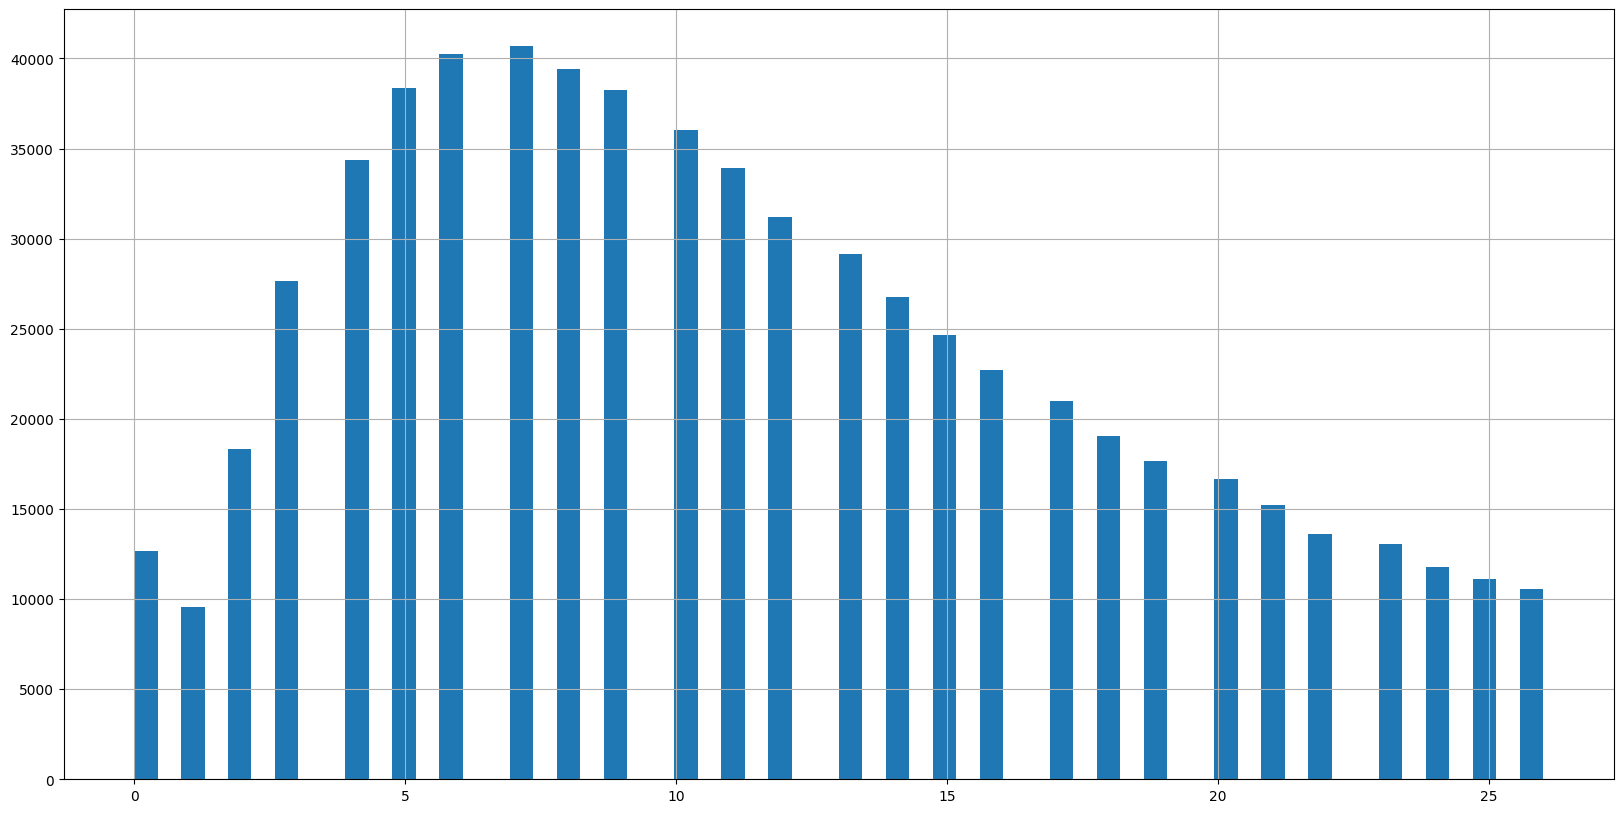

In [34]:
df['ride_length'].hist(bins=60, figsize=(20,10))


In [35]:
dfs[dfs['ride_length']==8]

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
7,22CA03D32C6BB094,classic_bike,2021-07-03 12:44:50,2021-07-03 12:52:55,8,Clark St & North Ave,13128,Clark St & Chicago Ave,13303,41.911974,-87.631942,41.896750,-87.630890,casual
11,3BB45ACFD928900D,classic_bike,2021-07-12 18:36:06,2021-07-12 18:44:29,8,Clark St & North Ave,13128,Stockton Dr & Wrightwood Ave,13276,41.911974,-87.631942,41.931320,-87.638742,member
22,225385AA48F29928,classic_bike,2021-07-08 13:01:33,2021-07-08 13:09:59,8,Halsted St & Roscoe St,TA1309000025,Clark St & Drummond Pl,TA1307000142,41.943670,-87.648950,41.931248,-87.644336,member
25,75BAA855BD87BC6C,classic_bike,2021-07-07 07:56:22,2021-07-07 08:05:02,8,Sheffield Ave & Wellington Ave,TA1307000052,Clark St & Drummond Pl,TA1307000142,41.936266,-87.652662,41.931248,-87.644336,member
29,42F0A865D394A44C,electric_bike,2021-07-17 21:39:03,2021-07-17 21:47:17,8,Greenview Ave & Diversey Pkwy,13294,Wilton Ave & Diversey Pkwy,TA1306000014,41.932581,-87.666083,41.932086,-87.652654,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822192,146B5AD90D2BFAC6,electric_bike,2021-07-19 16:27:24,2021-07-19 16:36:05,8,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.950000,-87.650000,member
822208,A05156678EAD3B34,electric_bike,2021-07-28 01:30:03,2021-07-28 01:38:09,8,NaN,NaN,Kingsbury St & Kinzie St,KA1503000043,41.910000,-87.640000,41.889470,-87.638573,member
822263,85F1CC12CD526EE3,electric_bike,2021-07-21 12:31:05,2021-07-21 12:39:58,8,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.930000,-87.660000,member
822275,4D1D85D98ACD851B,electric_bike,2021-07-18 15:18:28,2021-07-18 15:26:45,8,NaN,NaN,NaN,NaN,41.880000,-87.740000,41.900000,-87.750000,member


Performing feature engineering on the data can prove to be challenging after seeing the results above as it would be difficult to estimate departure and arrival stations. Some of the latitude and longitude data are not accurate to ascertain the location of the stations. The best course of acting in this case is to delete the rows with null values using the drop function.

In [36]:
df1=dfs.dropna()
df1

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,18,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,17,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,15,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,19,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
5,62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,5,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900328,-87.696735,41.913887,-87.705128,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822246,AA406D037058D7FD,classic_bike,2021-07-30 11:29:36,2021-07-30 11:37:35,7,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,member
822299,4AD181F39CCB99ED,classic_bike,2021-07-12 17:42:02,2021-07-12 17:45:44,3,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member
822338,834BDE579A88FA22,electric_bike,2021-07-27 16:08:22,2021-07-27 16:09:04,0,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043,41.889167,-87.638474,41.889186,-87.638539,member
822354,1C4C22D050DCED54,classic_bike,2021-07-19 16:29:44,2021-07-19 16:30:35,0,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,41.881320,-87.629521,member


In [37]:
df1.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,547504.000000,547504.000000,547504.000000,547504.000000,547504.000000
mean,11.333941,41.905719,-87.644996,41.905892,-87.645163
std,6.510839,0.036401,0.021949,0.036531,0.022062
min,0.000000,41.648501,-87.780000,41.648501,-87.780000
25%,6.000000,41.884576,-87.657023,41.884576,-87.657659
50%,10.000000,41.900960,-87.642746,41.902309,-87.642884
75%,16.000000,41.928712,-87.629912,41.928773,-87.629912
max,26.000000,42.064854,-87.528232,42.065027,-87.528232


In [38]:
df1.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
ride_length           0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [39]:
df1.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
ride_length                    int32
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

The above shows that the data is clean and is now ready to be used for analysis. I saved the clean data in a seperate folder.

In [ ]:
#df1.to_csv('202107_clean.csv', index=False)